In [ ]:
#估計與檢定
#統計：1. 描述統計; 2.檢定
#Python 資料分析
# 估計 (Estimation): 樣本 (smaple), 台灣抽菸人口百分比? 母體 (population) -> 抽樣 1000. (平均數)
# 假設檢定 (Hypothesis Testing): *黃色小熊會被12歲的小朋友喜愛
#----------------
#母數 (parameters): 母體特徵的平均數和標準差這些指標
#σ(sigma): 母體的標準差 μ(mu):母體的平均數, *樣本的標準差 S,平均數 X (bar)
#母體資料分配型態: 常態分配 (Normal Distribution)

In [ ]:
#抽樣: 樣本資料 (sampling data)
#1. 簡單隨機抽樣: Python 串列, 500 抽1 (隨機或是一定與比率抽)
#2. 系統抽樣: 先隨機選取, 後以母體大小除以樣本大小的間距進行抽樣。例如:第1次抽到11, 母體10000: 200 樣本, 10000/200=50, 所以第二個樣本 61, 第三個111
#3. 分層抽樣 (stratified sampling): strata 層
#4. 叢集抽樣:地區別或是組織別

In [1]:
#資料標準化: 使用【標準分數】(standard score) - Z (Z-score) (data science, 資料科學家)
#練習：在 Facebook 隨機選 24 個朋友樣本, 記下每個朋友的朋友數
import pandas as pd
friends = [110, 1017, 1127, 417, 624, 957, 89,
           951, 947, 797, 981, 125, 455, 731,
           1641, 486, 1307, 472, 1131, 1771, 905,
           532, 742, 633]
s_friends = pd.Series(friends)
print(s_friends.describe())
#5分鐘,請完成。7:25

count      24.000000
mean      789.500000
std       433.835874
min        89.000000
25%       482.500000
50%       769.500000
75%       990.000000
max      1771.000000
dtype: float64


In [5]:
#用 Z 表達朋友數
m = s_friends.mean()
print('平均數: ', m)
s = s_friends.std()
print('標準差: ', s)

z_score = []
for x in friends:
  z = (x - m)/s
  z_score.append(z)

print(z_score)
#3分鐘練習, 7:35

平均數:  789.5
標準差:  433.83587359437126
[-1.566260517762808, 0.5243918584121248, 0.777943965776229, -0.8586196363011713, -0.3814806706250842, 0.38609070894079517, -1.6146659200777733, 0.3722605939936622, 0.36304051736224024, 0.017287643683916203, 0.441411168729327, -1.5316852303949755, -0.7710289083026626, -0.13484362073454637, 1.9627238129139528, -0.6995733144091423, 1.192847414190218, -0.7318435826191192, 0.787164042407651, 2.262376303435167, 0.2662297127323095, -0.5935424331477895, -0.10948840999813594, -0.3607354982043847]


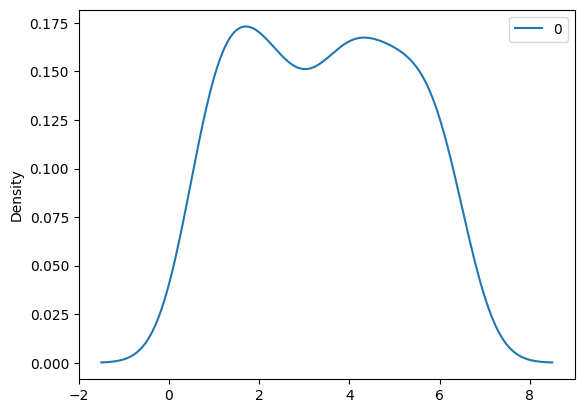

In [10]:
#中央極限定理: 抽樣數夠大, 都幾乎會是常態分配
# 休息10分鐘, 7:45開始
import matplotlib.pyplot as plt
import numpy as np
dice = [1, 2, 3, 4, 5, 6]
sample_means = []
for x in range(100):
  sample = np.random.choice(a=dice, size=1)
  sample_means.append(sample.mean())

df = pd.DataFrame(sample_means)
df.plot(kind='density')
plt.show()
#練習5分鐘, 8:03

In [12]:
#估計
#點估計 (point estimation): 民調調查結果,所有的選民有 45% 投給 2 號候選人
#區間估計 (interval estimate):全國 30%-48% 會投給 1 號候選人
#甚麼是好的估計: 1. 不偏差 (bias); 2. 有效; 3. 一致性

population = []
for x in range(10000):
  sample = np.random.choice(a=dice, size=100)
  population.append(sample.mean())
print('母體的平均數: ', sum(population)/10000)

母體的平均數:  3.5002239999999794


In [13]:
size_range = [10, 100, 1000]
for sample_size in size_range:
  sample = np.random.choice(a=population, size=sample_size)
  sample_mean = sample.mean()
  print(sample_size, '樣本平均數', sample_mean)

#5分鐘練習, 8:20

10 樣本平均數 3.5159999999999996
100 樣本平均數 3.470500000000001
1000 樣本平均數 3.50179


In [15]:
#區間估計: 例如：國內男性身高 95% 機率是在 161-179 公分之間
#95% 機率: 信賴係數 (confidence coefficent), 信賴水準
# 161-179 公分: 信賴區間 (confidence intervals)
# 95% 會準確, 顯著水準, 99%

# 進行區間估計的步驟: 1. 決定信賴係數; 2. 查詢 Z  分配表; 3.獲得信賴區間值

population = []
for x in range(10000):
  sample = np.random.choice(a=dice, size=100)
  population.append(sample.mean())
print('母體平均數: ', sum(population)/10000)

#第二節課休息, 8:40 繼續

母體平均數:  3.4998799999999997


In [16]:
import math
sample_size = 100
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()
print('樣本平均:', sample_mean)
sample_stdev = sample.std()
print('樣本標準差:', sample_stdev)
sigma = sample_stdev/math.sqrt(sample_size-1)
print('樣本計算出的母體標準差:', sigma)
#5分鐘練習, 8:52

樣本平均: 3.5135
樣本標準差: 0.19906971140783822
樣本計算出的母體標準差: 0.020007258783761556


In [17]:
#範例問題 1 (自由練習)：學校有一些交換學生, 有人認為交換生成績比較好, 有人不認為。怎麼證明?
# 交換學樣本 100 個學生, 成績平均是 71.5 分; 從教務處得到全校學生的平均成績 70分; 母體的標準差: 2.5
# H0: 交換生的成績和全校平均成績相同。
# Ha: 不同鄉。
import numpy as np
from scipy import stats
import math

population_mean = 70
sample_size = 100
sample_mean = 71.5
print('樣本平均:', sample_mean)
sigma = 2.5
z_obtained = (sample_mean - population_mean)/(sigma/math.sqrt(sample_size))
print('Z 檢定統計量: ', z_obtained) #-> =6, 表示 71.5 離假設母體平均數 70 有 6 個標準差之遠, 故沒有落在信賴區間內
z_critical = stats.norm.ppf(q= 0.975)
print('Z 分數: ', z_critical)

樣本平均: 71.5
Z 檢定統計量:  6.0
Z 分數:  1.959963984540054


In [22]:
#範例 2 (自由練習):
#披薩店希望各種披薩的銷售量相同, 能夠方便備料 (30份)
#蔬菜 20 地中海 16, 總匯 34, 夏威夷 40, 海鮮 38, 燻雞 32
#H0: 披薩的銷售量與期望銷售量相同
#Ha:不一致
observed = np.array([20, 16, 34, 40, 38, 32])
expected = np.array([30,30,30,30, 30, 30])
df = len(observed) - 1
print('自由度:', df)
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print('卡方檢定統計量:', chi_squared_stat)
chi_squared, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(chi_squared, p_value)
crit = stats.chi2.ppf(q = 0.95, df=df)
print('臨界區: ', crit)

#練習5分鐘, 至9:25


自由度: 5
卡方檢定統計量: 16.0
16.0 0.006844073922420431
臨界區:  11.070497693516351


    手機使用時間 (小時)  分數
0           0.0  87
1           0.0  89
2           0.0  91
3           1.0  90
4           1.3  82
5           1.5  80
6           2.0  78
7           2.2  81
8           2.6  76
9           3.2  85
10          4.1  80
11          4.4  73
12          5.0  72


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

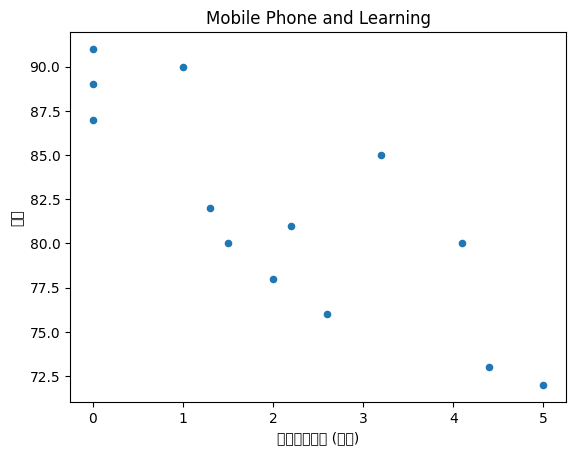

In [28]:
#範例 3
#學生每日使用手機時間與學習分數有相關
#使用小時:
hours_phone_used = [0,0,0,1, 1.3, 1.5, 2, 2.2, 2.6, 3.2, 4.1, 4.4, 5]
score = [87, 89, 91, 90, 82, 80, 78, 81, 76, 85, 80, 73, 72]

df = pd.DataFrame({'手機使用時間 (小時)': hours_phone_used, '分數':score})
print(df)
df.plot(kind='scatter', x='手機使用時間 (小時)', y='分數')
plt.title('Mobile Phone and Learning')
plt.show()
#1.統計方式:平均值, 看變異的程度
#2.相關係數